

# About Dataset

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

Source

The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

Content

The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.
Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving thyroid.csv to thyroid.csv


In [ ]:
data = pd.read_csv("thyroid.csv")

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# Target Variable = Recurred

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
data.isna().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0




1.   Here I observed no missing values are present .
2.   And, all the data types are correctlt mentioned.



In [ ]:
data.shape

(383, 17)

In [ ]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

Here I used to change Male 'M' to 1
and Female to o

In [ ]:
if (data['Gender'] == 'M').any():
    data['Gender'] = 1
else:
    data['Gender'] = 0

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,1,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
data['Gender'].dtype

dtype('int64')

In [ ]:
data['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

Here i change the object dtype

Yes to 1

No to 0

In [ ]:
if (data['Smoking'] == 'Yes').any():
    data['Smoking'] = 1
else:
    data['Smoking'] = 0

In [ ]:
data['Smoking'].dtype

dtype('int64')

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,1,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,1,1,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
data['Hx Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Hx Smoking'] = data['Hx Smoking'].replace('Yes',1)
data['Hx Smoking'] = data['Hx Smoking'].replace('No',0)

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,1,0,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,1,1,1,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
 data['Hx Radiothreapy'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].replace('Yes',1)
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].replace('No',0)

In [ ]:
data.head(1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No


In [ ]:
data['Thyroid Function'].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [ ]:
data['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [ ]:

data['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
#without sparse we got an error
encoder = OHE.fit_transform(data[['Adenopathy']])

In [ ]:
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Adenopathy']))

In [ ]:

data = pd.concat([data,encoder_df],axis=1)

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,M,Stage,Response,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,M0,I,Indeterminate,No,0.0,0.0,0.0,1.0,0.0,0.0
1,34,1,1,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,M0,I,Excellent,No,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data.drop('Adenopathy',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   383 non-null    int64  
 1   Gender                383 non-null    int64  
 2   Smoking               383 non-null    int64  
 3   Hx Smoking            383 non-null    int64  
 4   Hx Radiothreapy       383 non-null    int64  
 5   Thyroid Function      383 non-null    object 
 6   Physical Examination  383 non-null    object 
 7   Pathology             383 non-null    object 
 8   Focality              383 non-null    object 
 9   Risk                  383 non-null    object 
 10  T                     383 non-null    object 
 11  N                     383 non-null    object 
 12  M                     383 non-null    object 
 13  Stage                 383 non-null    object 
 14  Response              383 non-null    object 
 15  Recurred              3

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Pathology,Focality,Risk,...,M,Stage,Response,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,Micropapillary,Uni-Focal,Low,...,M0,I,Indeterminate,No,0.0,0.0,0.0,1.0,0.0,0.0
1,34,1,1,1,0,Euthyroid,Multinodular goiter,Micropapillary,Uni-Focal,Low,...,M0,I,Excellent,No,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Response_encoded'] = LE.fit_transform(data['Response'])
data['Response_encoded']

,Response_encoded
0,2
1,1
2,1
3,1
4,1
...,...
378,0
379,3
380,3
381,3


In [ ]:
data['Response_encoded'].unique()

array([2, 1, 3, 0])

Excellent : 1

Intermediate : 2

Sturctural Incomplete : 3

Biochemical Incomplete : 0

In [ ]:
data.drop('Response',axis=1,inplace = True)

In [ ]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Pathology,Focality,Risk,...,M,Stage,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Response_encoded
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,Micropapillary,Uni-Focal,Low,...,M0,I,No,0.0,0.0,0.0,1.0,0.0,0.0,2
1,34,1,1,1,0,Euthyroid,Multinodular goiter,Micropapillary,Uni-Focal,Low,...,M0,I,No,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
data['T'].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [ ]:
data['N'].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [ ]:
data['M'].unique()

array(['M0', 'M1'], dtype=object)

In [ ]:
data['Stage'].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [ ]:
data['Stage_encoded'] = LE.fit_transform(data['Stage'])
data['Stage_encoded']

,Stage_encoded
0,0
1,0
2,0
3,0
4,0
...,...
378,4
379,4
380,4
381,3


In [ ]:
data.drop('Stage',axis=1,inplace = True)

In [ ]:
data['T_encoded'] = LE.fit_transform(data['T'])
data['T_encoded']

,T_encoded
0,0
1,0
2,0
3,0
4,0
...,...
378,6
379,6
380,6
381,6


In [ ]:
data.drop('T',axis=1,inplace = True)

In [ ]:
data['M'] = data['M'].replace('M0',0)
data['M'] = data['M'].replace('M1',1)

In [ ]:
data['N'] = data['N'].replace('N0',0)
data['N'] = data['N'].replace('N1b',1)
data['N'] = data['N'].replace('N1a',2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   383 non-null    int64  
 1   Gender                383 non-null    int64  
 2   Smoking               383 non-null    int64  
 3   Hx Smoking            383 non-null    int64  
 4   Hx Radiothreapy       383 non-null    int64  
 5   Thyroid Function      383 non-null    object 
 6   Physical Examination  383 non-null    object 
 7   Pathology             383 non-null    object 
 8   Focality              383 non-null    object 
 9   Risk                  383 non-null    object 
 10  N                     383 non-null    int64  
 11  M                     383 non-null    int64  
 12  Recurred              383 non-null    object 
 13  Adenopathy_Bilateral  383 non-null    float64
 14  Adenopathy_Extensive  383 non-null    float64
 15  Adenopathy_Left       3

In [ ]:
data['Risk'].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [ ]:

data['Risk'] = data['Risk'].replace('Low',0)
data['Risk'] = data['Risk'].replace('High',2)

In [ ]:
data['Risk'] = data['Risk'].replace('Intermediate',1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   383 non-null    int64  
 1   Gender                383 non-null    int64  
 2   Smoking               383 non-null    int64  
 3   Hx Smoking            383 non-null    int64  
 4   Hx Radiothreapy       383 non-null    int64  
 5   Thyroid Function      383 non-null    object 
 6   Physical Examination  383 non-null    object 
 7   Pathology             383 non-null    object 
 8   Focality              383 non-null    object 
 9   Risk                  383 non-null    int64  
 10  N                     383 non-null    int64  
 11  M                     383 non-null    int64  
 12  Recurred              383 non-null    object 
 13  Adenopathy_Bilateral  383 non-null    float64
 14  Adenopathy_Extensive  383 non-null    float64
 15  Adenopathy_Left       3

In [ ]:
data['Risk'].unique()

array([0, 1, 2])

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Pathology,Focality,Risk,...,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,Micropapillary,Uni-Focal,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,2,0,0
1,34,1,1,1,0,Euthyroid,Multinodular goiter,Micropapillary,Uni-Focal,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
2,30,1,1,0,0,Euthyroid,Single nodular goiter-right,Micropapillary,Uni-Focal,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
3,62,1,1,0,0,Euthyroid,Single nodular goiter-right,Micropapillary,Uni-Focal,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
4,62,1,1,0,0,Euthyroid,Multinodular goiter,Micropapillary,Multi-Focal,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0


In [ ]:
data['Focality'].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [ ]:
data['Focality'] = data['Focality'].replace('Uni-Focal',0)
data['Focality'] = data['Focality'].replace('Multi-Focal',1)

In [ ]:
data['Focality'].unique()

array([0, 1])

In [ ]:
data['Focality'].dtype

dtype('int64')

In [ ]:
data['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [ ]:
data['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Pathology,Focality,Risk,...,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,Micropapillary,0,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,2,0,0
1,34,1,1,1,0,Euthyroid,Multinodular goiter,Micropapillary,0,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
2,30,1,1,0,0,Euthyroid,Single nodular goiter-right,Micropapillary,0,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
3,62,1,1,0,0,Euthyroid,Single nodular goiter-right,Micropapillary,0,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
4,62,1,1,0,0,Euthyroid,Multinodular goiter,Micropapillary,1,0,...,No,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0


In [ ]:
data['Thyroid Function'].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [ ]:
encoder = OHE.fit_transform(data[['Thyroid Function']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Thyroid Function']))
data = pd.concat([data,encoder_df],axis=1)

In [ ]:
data.head(1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Pathology,Focality,Risk,...,Adenopathy_Posterior,Adenopathy_Right,Response_encoded,Stage_encoded,T_encoded,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,Micropapillary,0,0,...,0.0,0.0,2,0,0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data.drop('Thyroid Function',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           383 non-null    int64  
 1   Gender                                        383 non-null    int64  
 2   Smoking                                       383 non-null    int64  
 3   Hx Smoking                                    383 non-null    int64  
 4   Hx Radiothreapy                               383 non-null    int64  
 5   Physical Examination                          383 non-null    object 
 6   Pathology                                     383 non-null    object 
 7   Focality                                      383 non-null    int64  
 8   Risk                                          383 non-null    int64  
 9   N                                             383 non-null    int

In [ ]:
encoder = OHE.fit_transform(data[['Physical Examination']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Physical Examination']))
data = pd.concat([data,encoder_df],axis=1)

In [ ]:
data.drop('Physical Examination',axis=1,inplace=True)

In [ ]:
data.head(9)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Pathology,Focality,Risk,N,M,...,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right
0,27,1,1,0,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,1,1,1,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,1,1,0,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,62,1,1,0,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,1,1,0,0,Micropapillary,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,52,1,1,0,0,Micropapillary,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,41,1,1,1,0,Micropapillary,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,46,1,1,0,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,51,1,1,0,0,Micropapillary,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
378,False
379,False
380,False
381,False


In [ ]:
data.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Adenopathy_Bilateral,...,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right
count,383.000000,383.0,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,1.0,1.0,0.073107,0.018277,0.355091,0.433420,0.357702,0.046997,0.083551,...,0.052219,0.031332,0.866841,0.013055,0.036554,0.018277,0.365535,0.018277,0.232376,0.365535
std,15.134494,0.0,0.0,0.260653,0.134126,0.479167,0.643233,0.587823,0.211910,0.277075,...,0.222760,0.174440,0.340191,0.113658,0.187908,0.134126,0.482210,0.134126,0.422900,0.482210
min,15.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.0,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,82.000000,1.0,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

One-Hot Encoding: Use when the categories are nominal and do not have an intrinsic order.

Label Encoding: Use when the categories have an ordinal relationship and you are using algorithms that can handle this type of encoding (e.g., tree-based algorithms).

Ordinal Encoding: Use when the categories have an intrinsic order, and the ordinal relationship is meaningful for the model.

In [ ]:
encoder = OHE.fit_transform(data[['Pathology']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Pathology']))
data = pd.concat([data,encoder_df],axis=1)

In [ ]:
data.drop('Pathology',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               383 non-null    int64  
 1   Gender                                            383 non-null    int64  
 2   Smoking                                           383 non-null    int64  
 3   Hx Smoking                                        383 non-null    int64  
 4   Hx Radiothreapy                                   383 non-null    int64  
 5   Focality                                          383 non-null    int64  
 6   Risk                                              383 non-null    int64  
 7   N                                                 383 non-null    int64  
 8   M                                                 383 non-null    int64  
 9   Recurred             

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,...,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,1,0,0,0,0,0,0,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,1,1,1,0,0,0,0,0,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,1,1,0,0,0,0,0,0,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,62,1,1,0,0,0,0,0,0,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,62,1,1,0,0,1,0,0,0,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data['Pathology_Papillary'].unique()

array([0., 1.])

In [ ]:

data['Recurred'] = data['Recurred'].replace('No',0)
data['Recurred'] = data['Recurred'].replace('Yes',1)

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [ ]:
numerical_features

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality',
       'Risk', 'N', 'M', 'Recurred', 'Adenopathy_Bilateral',
       'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No',
       'Adenopathy_Posterior', 'Adenopathy_Right', 'Response_encoded',
       'Stage_encoded', 'T_encoded',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary'],
      dtype='object')

In [ ]:
categorical_features

Index([], dtype='object')

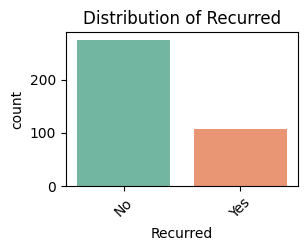

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(3,2))
    sns.countplot(data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Box Plots for Outliers

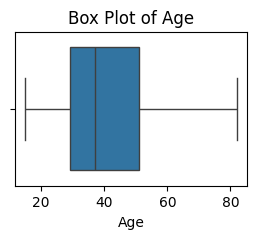

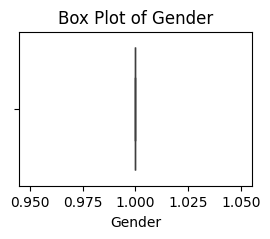

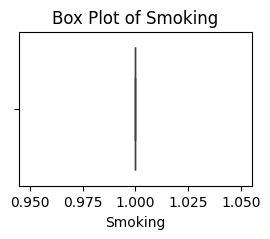

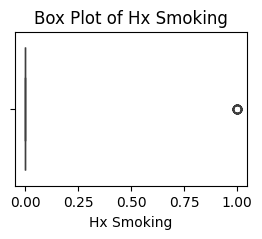

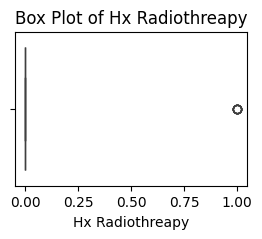

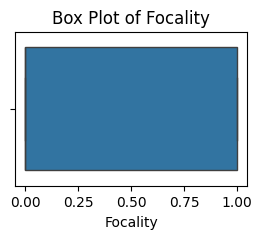

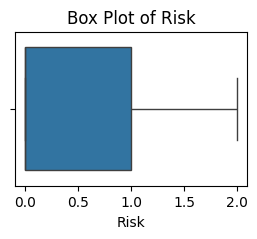

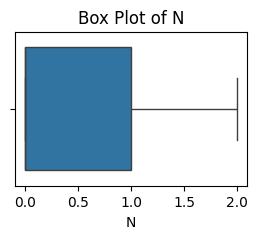

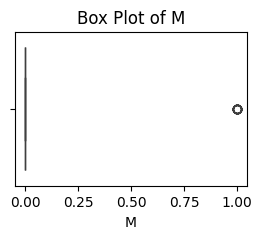

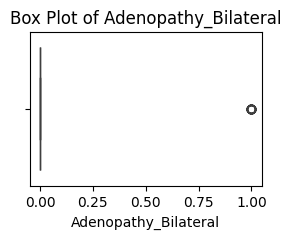

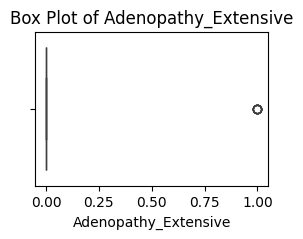

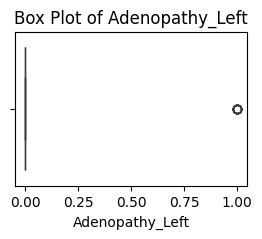

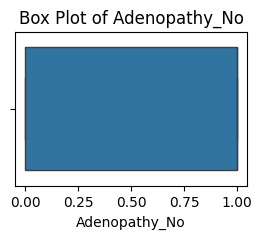

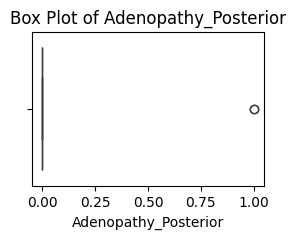

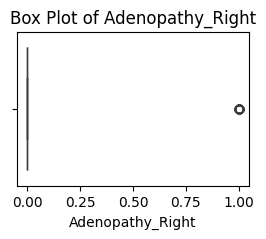

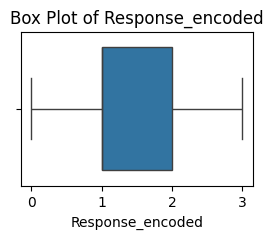

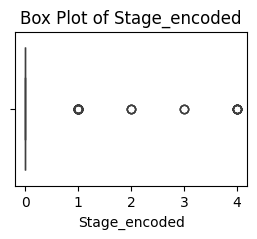

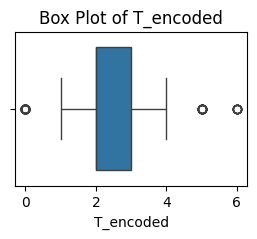

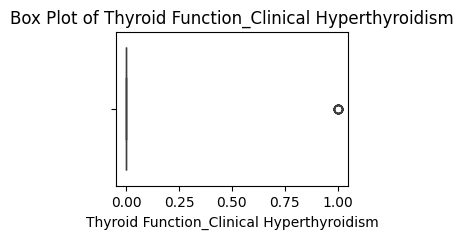

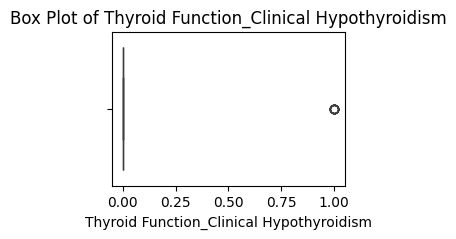

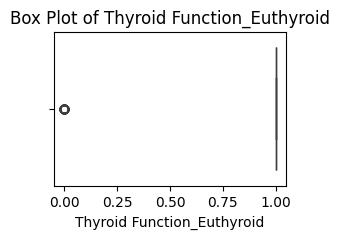

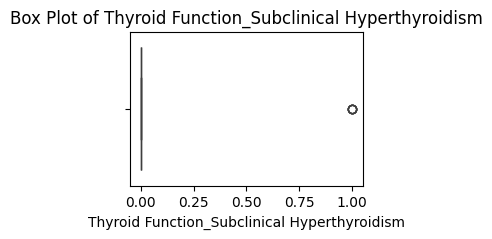

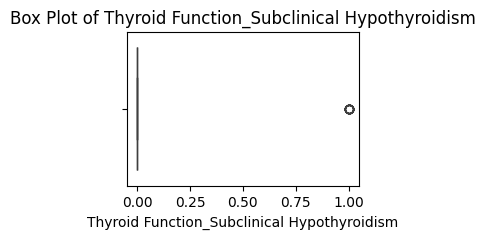

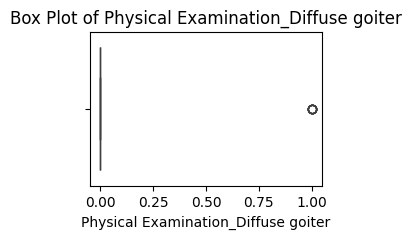

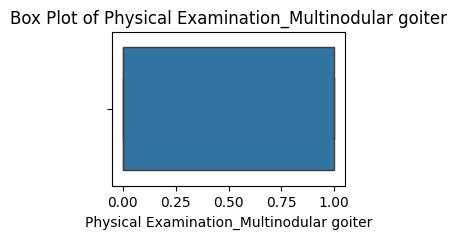

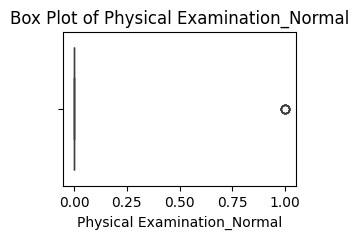

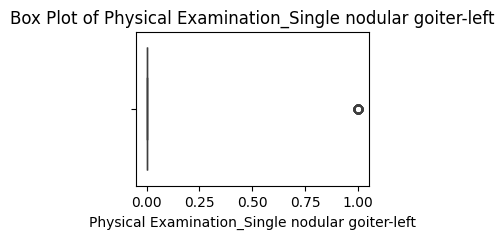

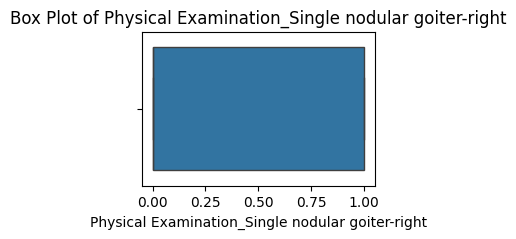

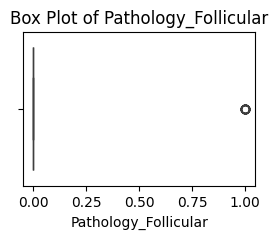

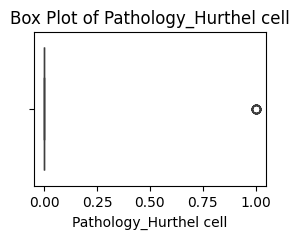

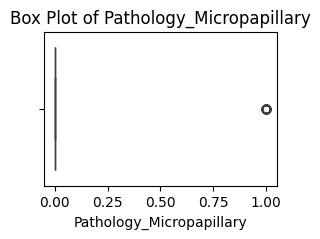

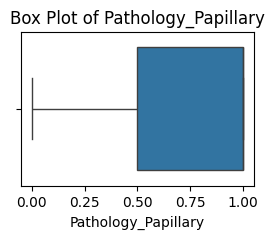

In [ ]:
# Box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

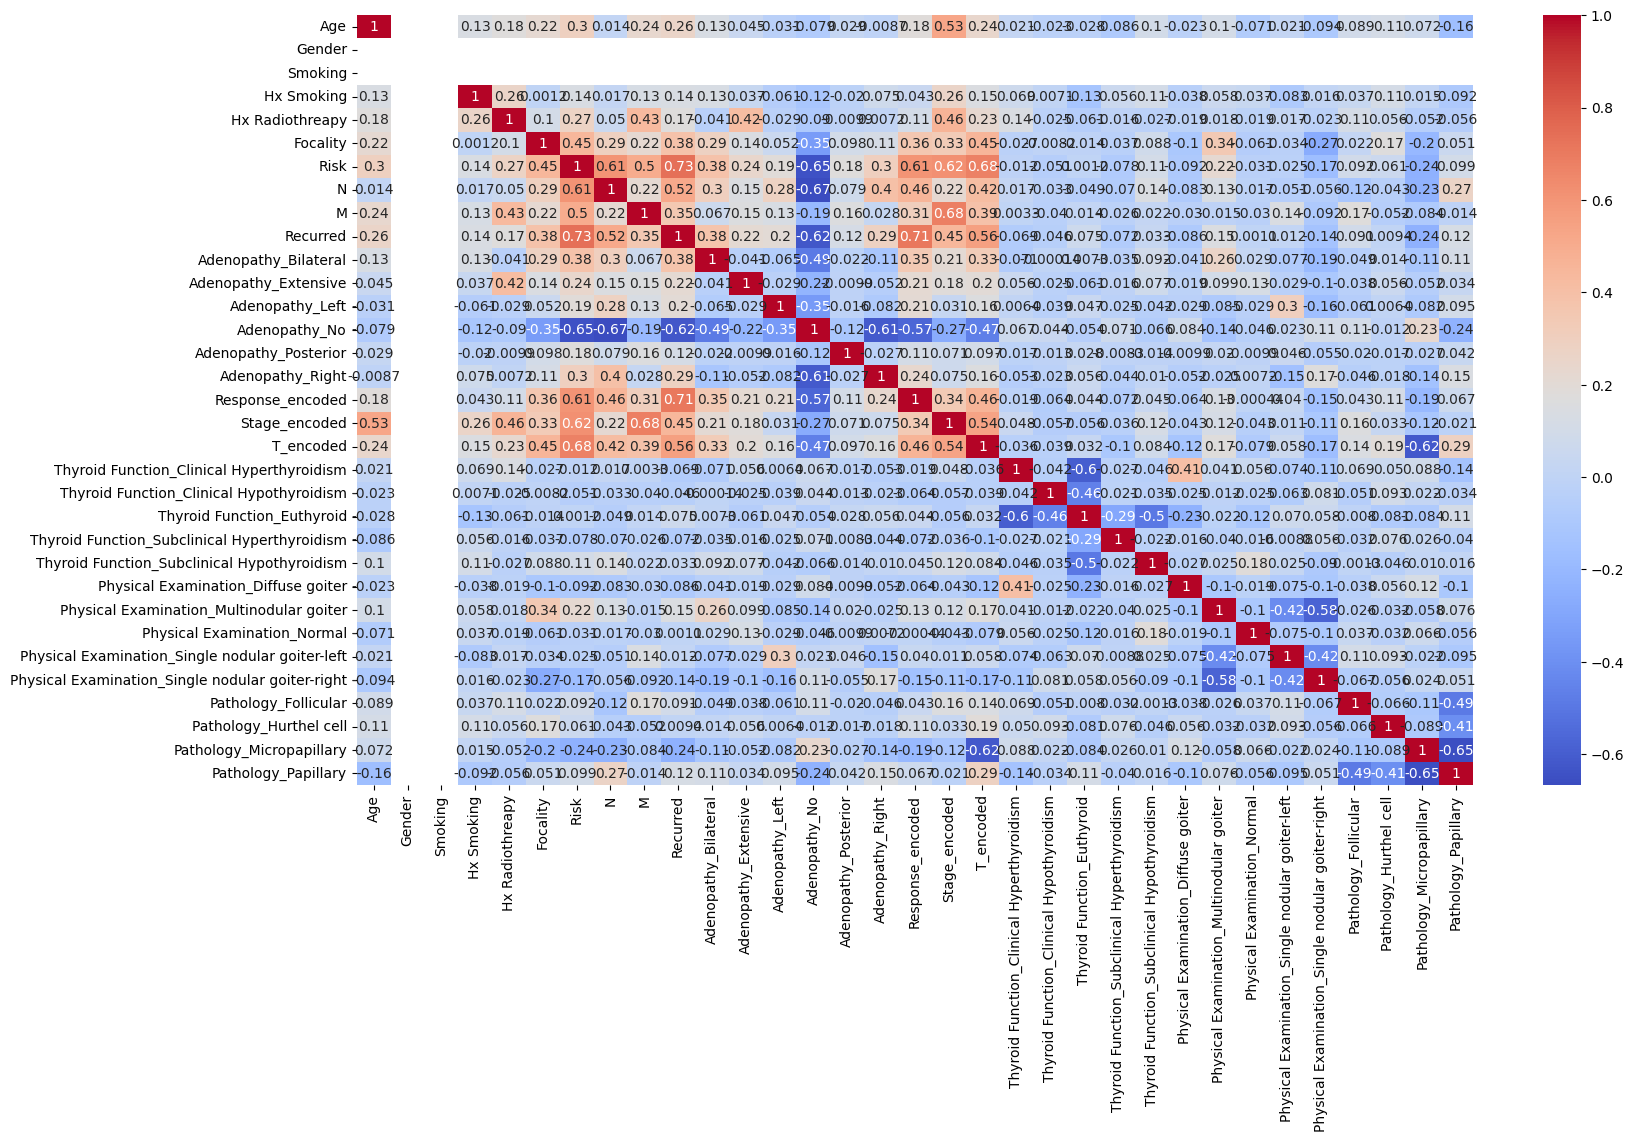

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features for VIF
X = data.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                             Feature       VIF
0                                                Age  1.583322
1                                             Gender  0.000000
2                                            Smoking  0.000000
3                                         Hx Smoking  1.250446
4                                    Hx Radiothreapy  1.741392
5                                           Focality  1.553469
6                                               Risk  4.577322
7                                                  N  2.308641
8                                                  M  2.344383
9                                           Recurred  3.162341
10                              Adenopathy_Bilateral       inf
11                              Adenopathy_Extensive       inf
12                                   Adenopathy_Left       inf
13                                     Adenopathy_No       inf
14                              Adenopathy_Posterior   

In [ ]:
features_to_drop = vif_data[vif_data['VIF'] == float('inf')]['Feature'].tolist()

In [ ]:
features_to_drop

['Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary']

In [ ]:
data.drop(features_to_drop,axis=1,inplace=True)

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,0,0,0,0,0,2,0,0
1,34,1,1,1,0,0,0,0,0,0,1,0,0
2,30,1,1,0,0,0,0,0,0,0,1,0,0
3,62,1,1,0,0,0,0,0,0,0,1,0,0
4,62,1,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
data.shape

(383, 13)

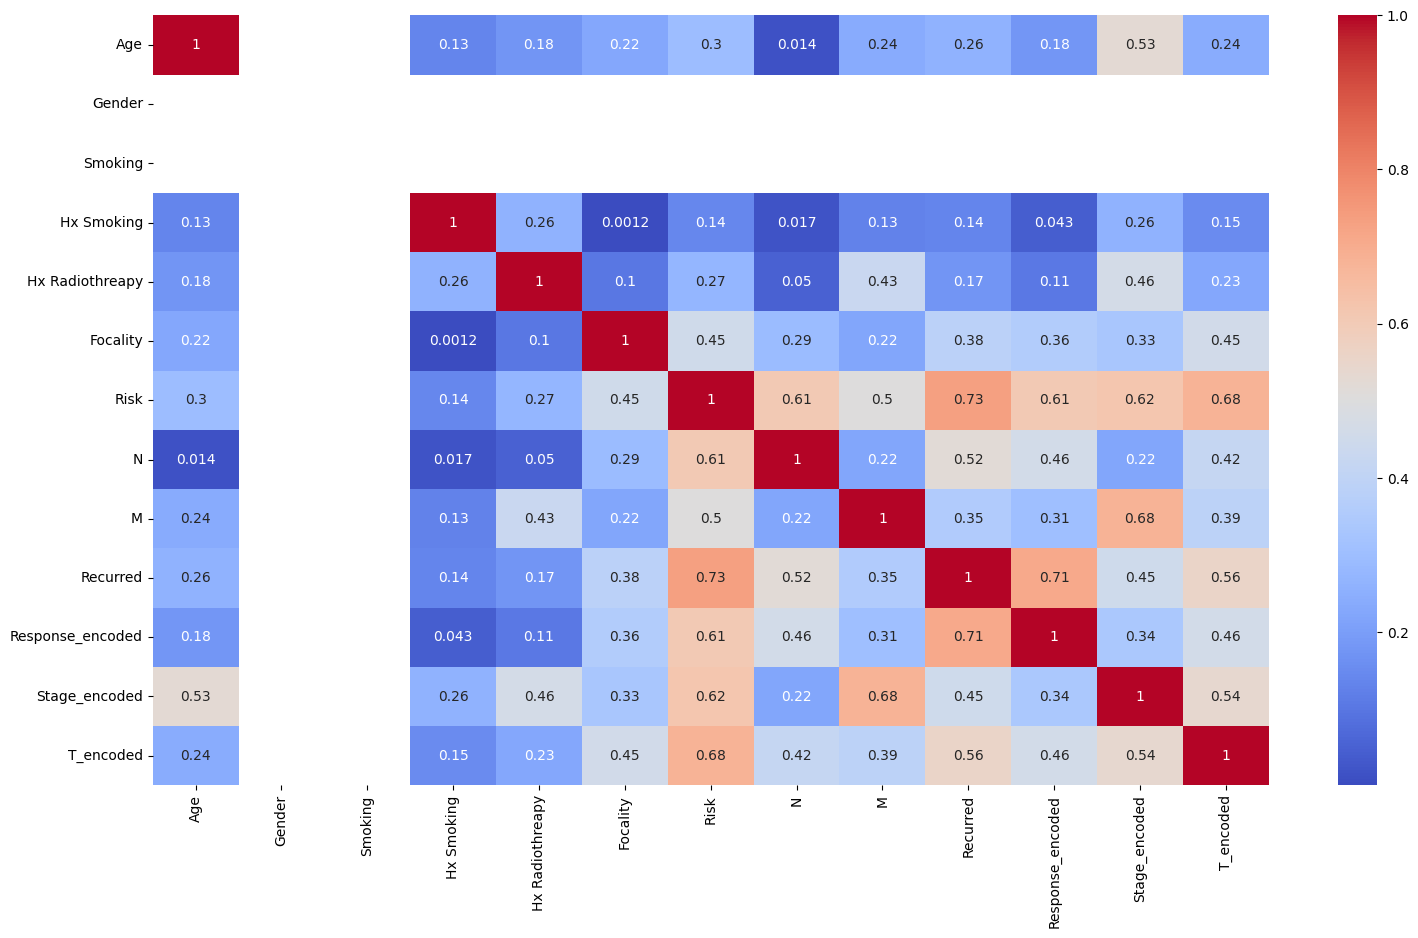

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X_train = data.drop('Recurred',axis=1)
y_train = data['Recurred']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
data.head(1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,0,0,0,0,0,2,0,0


In [ ]:
y_pred = LR.predict(X_test_scaled)

In [ ]:
print (classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

0.935064935064935
[[57  1]
 [ 4 15]]


In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = Tree.predict(X_test_scaled)

In [ ]:
print (classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.84      0.84      0.84        19

    accuracy                           0.92        77
   macro avg       0.90      0.90      0.90        77
weighted avg       0.92      0.92      0.92        77

0.922077922077922
[[55  3]
 [ 3 16]]


In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = RF.predict(X_test_scaled)

In [ ]:
print (classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

0.987012987012987
[[58  0]
 [ 1 18]]


In [ ]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred3 = svc.predict(X_test_scaled)

In [ ]:
print (classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

0.974025974025974
[[58  0]
 [ 2 17]]


In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred4 = svc.predict(X_test_scaled)

In [ ]:
print (classification_report(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

0.974025974025974
[[58  0]
 [ 2 17]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, verbose=2)

In [ ]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9542041248016921


In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,0,0,0,0,0,2,0,0
1,34,1,1,1,0,0,0,0,0,0,1,0,0
2,30,1,1,0,0,0,0,0,0,0,1,0,0
3,62,1,1,0,0,0,0,0,0,0,1,0,0
4,62,1,1,0,0,1,0,0,0,0,1,0,0


In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleanedthyroiddata1.csv to cleanedthyroiddata1.csv


In [3]:
df = pd.read_csv('cleanedthyroiddata1.csv')

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,...,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,34,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,30,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,62,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,62,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features for VIF
X = df.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                             Feature       VIF
0                                                Age  1.583322
1                                             Gender  0.000000
2                                            Smoking  0.000000
3                                         Hx Smoking  1.250446
4                                    Hx Radiothreapy  1.741392
5                                           Focality  1.553469
6                                               Risk  4.577322
7                                                  N  2.308641
8                                                  M  2.344383
9                                           Recurred  3.162341
10                              Adenopathy_Bilateral       inf
11                              Adenopathy_Extensive       inf
12                                   Adenopathy_Left       inf
13                                     Adenopathy_No       inf
14                              Adenopathy_Posterior   

In [6]:
features_to_drop = vif_data[vif_data['VIF'] == float('inf')]['Feature'].tolist()

In [7]:
features_to_drop

['Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary']

In [8]:
df.drop(features_to_drop,axis=1,inplace=True)

In [9]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,Response_encoded,Stage_encoded,T_encoded
0,27,1,1,0,0,0,0,0,0,0,2,0,0
1,34,1,1,1,0,0,0,0,0,0,1,0,0
2,30,1,1,0,0,0,0,0,0,0,1,0,0
3,62,1,1,0,0,0,0,0,0,0,1,0,0
4,62,1,1,0,0,1,0,0,0,0,1,0,0


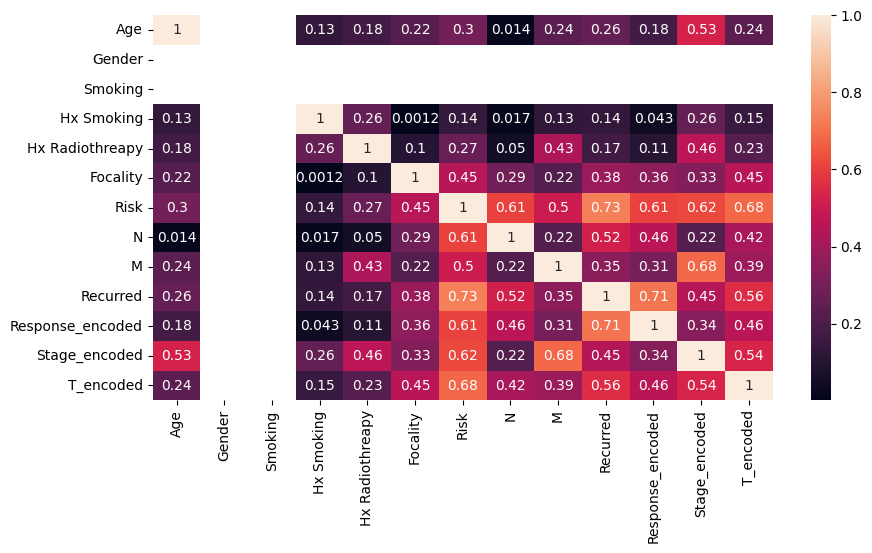

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

Analyze the Correlation with the Target Variable:
Focus on the features that have a strong correlation (either positively or negatively) with your target variable (e.g., Recurred). Generally, correlations above ±0.5 indicate a strong relationship.

Features that are highly correlated with each other (above ±0.8) can cause multicollinearity, which can degrade model performance. In this case, consider removing one of the correlated features.

High Correlation Between Features:

Risk is highly correlated with N (0.61), M (0.52), and Stage_encoded (0.62).

Stage_encoded is also highly correlated with N (0.68) and M (0.68).

Recurred shows a decent correlation with Risk (0.73), N (0.52), and Stage_encoded (0.71).

Potential Multicollinearity:

Features like Risk, Stage_encoded, N, and M are strongly correlated with each other. Including all of them might introduce multicollinearity.

In [13]:
df.drop(['N'],axis=1,inplace=True)

In [14]:
df.drop(['M'],axis=1,inplace=True)

In [15]:
df.drop(['Stage_encoded'],axis=1,inplace=True)

In [16]:
df.drop(['Risk'],axis=1,inplace=True)

In [17]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Recurred,Response_encoded,T_encoded
0,27,1,1,0,0,0,0,2,0
1,34,1,1,1,0,0,0,1,0
2,30,1,1,0,0,0,0,1,0
3,62,1,1,0,0,0,0,1,0
4,62,1,1,0,0,1,0,1,0


In [18]:
X = df.drop('Recurred',axis=1)
y = df['Recurred']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961


. Evaluate Feature Importance (Optional):
For tree-based models like Random Forest, you can check feature importance to guide further selection.

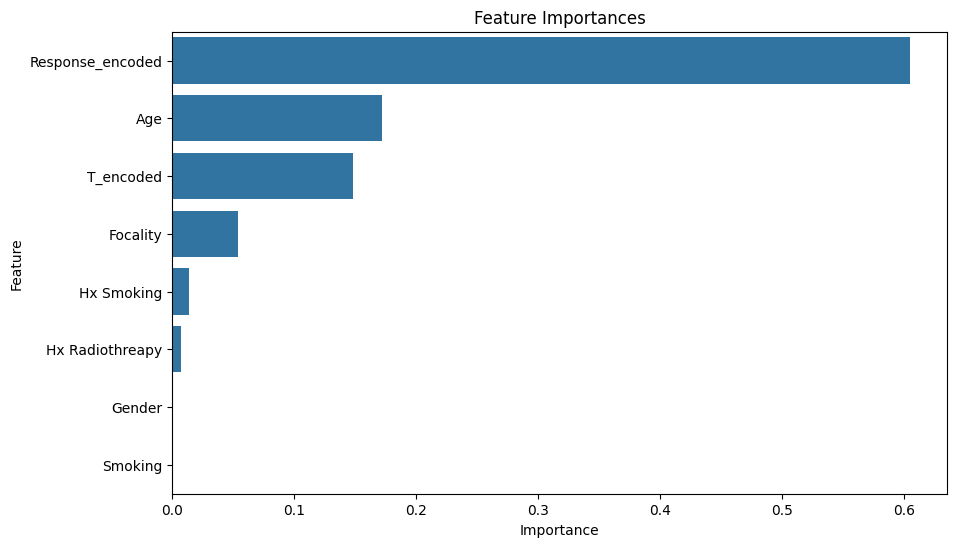

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = RF.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.show()


Recursive Feature Elimination (RFE):
Use recursive feature elimination to select the most important features.

In [24]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Selected Features:", X.columns[rfe.support_])


Selected Features: Index(['Age', 'Hx Smoking', 'Focality', 'Response_encoded', 'T_encoded'], dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               383 non-null    int64
 1   Gender            383 non-null    int64
 2   Smoking           383 non-null    int64
 3   Hx Smoking        383 non-null    int64
 4   Hx Radiothreapy   383 non-null    int64
 5   Focality          383 non-null    int64
 6   Recurred          383 non-null    int64
 7   Response_encoded  383 non-null    int64
 8   T_encoded         383 non-null    int64
dtypes: int64(9)
memory usage: 27.1 KB


In [31]:
df.drop(['Gender'],axis=1)

,Age,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Recurred,Response_encoded,T_encoded
0,27,1,0,0,0,0,2,0
1,34,1,1,0,0,0,1,0
2,30,1,0,0,0,0,1,0
3,62,1,0,0,0,0,1,0
4,62,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
378,72,1,1,1,0,1,0,6
379,81,1,0,1,1,1,3,6
380,72,1,1,0,1,1,3,6
381,61,1,1,1,1,1,3,6


In [32]:
df.drop(['Smoking'],axis=1)

,Age,Gender,Hx Smoking,Hx Radiothreapy,Focality,Recurred,Response_encoded,T_encoded
0,27,1,0,0,0,0,2,0
1,34,1,1,0,0,0,1,0
2,30,1,0,0,0,0,1,0
3,62,1,0,0,0,0,1,0
4,62,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
378,72,1,1,1,0,1,0,6
379,81,1,0,1,1,1,3,6
380,72,1,1,0,1,1,3,6
381,61,1,1,1,1,1,3,6


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [27]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

Accuracy: 0.974025974025974


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Mean CV Score:", cv_scores.mean())


Mean CV Score: 0.8321941216678057


1. Accuracy: 0.961 (Random Forest Classifier)
This is the accuracy of your model before hyperparameter tuning.
An accuracy of 0.961 means the model correctly predicts 96.1% of the test data.
2. Accuracy: 0.974 (After Hyperparameter Tuning)
After tuning, your model's accuracy increased to 0.974 (97.4%).
This improvement suggests that the hyperparameter tuning process was successful in optimizing the model’s performance.
3. Mean CV Score: 0.832 (83.2%)
Cross-validation (CV) provides a more robust estimate of model performance by testing it across multiple folds of the dataset.
A mean CV score of 0.832 indicates that, on average, the model correctly predicts about 83.2% of the cases across different data splits.
The large gap between the cross-validation score (83.2%) and the accuracy (97.4%) indicates potential overfitting. The model performs well on the specific train/test split but may not generalize as effectively across different subsets of data.

After fs i done this


In [33]:
X = df.drop('Recurred',axis=1)
y = df['Recurred']

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [36]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

Accuracy: 0.974025974025974


In [37]:

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Mean CV Score:", cv_scores.mean())

Mean CV Score: 0.8321941216678057


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
RF = RandomForestClassifier()

# Train the model
RF.fit(X_train, y_train)

# Predict on test data
y_pred = RF.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.961038961038961
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.94      0.89      0.92        19

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



What the Numbers Indicate:
Initial Accuracy (96%): Your model had a decent performance initially.
Improved Accuracy (97%): Hyperparameter tuning led to a slight increase in test accuracy.
Drop in CV Score (83%): A significant drop in cross-validation performance suggests your model might be overfitting or not generalizing well across different data splits.

1. Identifying Data Imbalance:

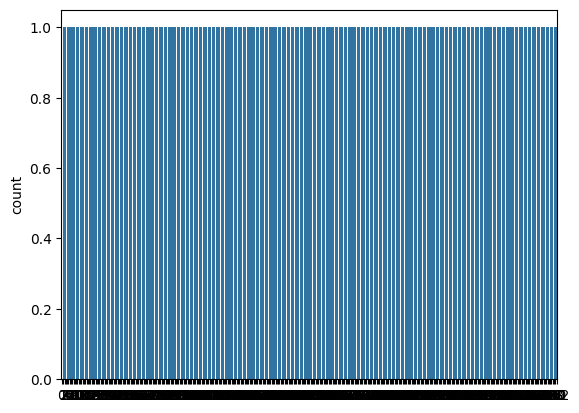

In [45]:
# Checking class distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y)
plt.show()


In [46]:
df.to_csv('cleanedtd.csv')

In [47]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Recurred,Response_encoded,T_encoded
0,27,1,1,0,0,0,0,2,0
1,34,1,1,1,0,0,0,1,0
2,30,1,1,0,0,0,0,1,0
3,62,1,1,0,0,0,0,1,0
4,62,1,1,0,0,1,0,1,0


In [50]:
df.to_csv('cleaned_data.csv',index=False)